Recorrer archivos de texto de cada carpeta del dataset

In [ ]:
import os

dataset_path = 'dataset/Gutenberg_Text-master'

for root, dirs, files in os.walk(dataset_path):
    if files:
        print(f"Nombre de la carpeta: {os.path.basename(root)}")
        print("-" * 50)
        for file_name in files:
            print(file_name)
        print("=" * 50)


Cantidad de palabras por archivo de texto

In [ ]:
import os

def count_words(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        text = file.read()
        words = text.split()
        return len(words)

def mapreduce_word_count(dataset_path):
    for foldername, _, filenames in os.walk(dataset_path):
        if foldername == dataset_path:
            continue
        total_words = 0
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            word_count = count_words(file_path)
            total_words += word_count
        print("Nombre de la carpeta:", foldername)
        print("Total de palabras:", total_words)
        print("-" * 50)


dataset_path = "dataset/Gutenberg_Text-master"

mapreduce_word_count(dataset_path)


In [ ]:
import os
import time

def count_words(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        text = file.read()
        words = text.split()
        return len(words)

def mapreduce_word_count(dataset_path):
    total_words = 0
    start_time = time.time()
    for foldername, _, filenames in os.walk(dataset_path):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            word_count = count_words(file_path)
            total_words += word_count
    end_time = time.time()
    processing_time = end_time - start_time
    print("Total de palabras en la carpeta principal:", total_words)
    print("Tiempo de procesamiento:", processing_time, "segundos")

# Ruta del dataset
dataset_path = "dataset/Gutenberg_Text-master"

# Ejecutar el contador de palabras y medir el tiempo de procesamiento
mapreduce_word_count(dataset_path)


Total de palabras en la carpeta principal: 211893581
Tiempo de procesamiento: 19.244776964187622 segundos


Implementacion de MapReduce

In [ ]:
import os
import time
from concurrent.futures import ThreadPoolExecutor
from collections import defaultdict

def count_words(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        text = file.read()
        words = text.split()
        return [(word, 1) for word in words]

def mapreduce_word_count(dataset_paths, dataset_fraction, num_processors):
    word_counts = defaultdict(int)

    # Etapa de mapeo
    def map_task(file_path):
        return count_words(file_path)

    with ThreadPoolExecutor(max_workers=num_processors) as executor:
        map_results = []
        for dataset_path in dataset_paths:
            for foldername, _, filenames in os.walk(dataset_path):
                for filename in filenames:
                    file_path = os.path.join(foldername, filename)
                    map_result = executor.submit(map_task, file_path)
                    map_results.append(map_result)

        for map_result in map_results:
            mapped_data = map_result.result()
            for word, count in mapped_data:
                word_counts[word] += count

    # Etapa de reducción
    total_words = sum(word_counts.values())

    end_time = time.time()
    processing_time = end_time - start_time
    print("Fracción de dataset:", dataset_fraction, "%")
    print("Número de procesadores:", num_processors)
    print("Total de palabras:", total_words)
    print("Tiempo de procesamiento:", processing_time, "segundos")
    print("----------------------------------------")


dataset_path = "dataset/Gutenberg_Text-master"

dataset_fractions = [50]
num_processors_list = [1, 2, 4]

for dataset_fraction in dataset_fractions:
    for num_processors in num_processors_list:
        files_fraction = int(len(os.listdir(dataset_path)) * dataset_fraction / 100)

        files_to_process = [os.path.join(dataset_path, filename) for filename in os.listdir(dataset_path)[:files_fraction]]

        start_time = time.time()
        mapreduce_word_count(files_to_process, dataset_fraction, num_processors)


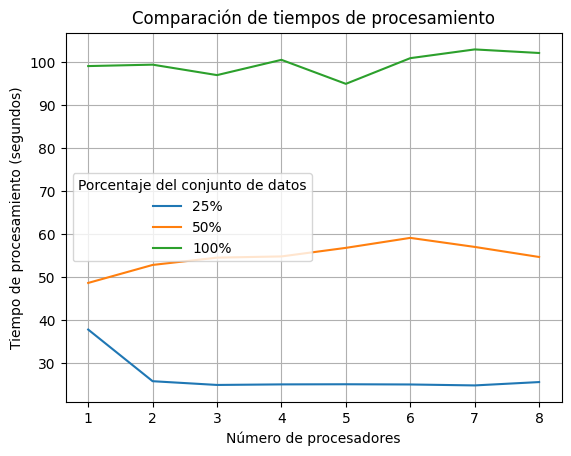

In [1]:
import matplotlib.pyplot as plt

dataset_fractions = [25, 50, 100]
num_processors = [1, 2, 3, 4, 5, 6, 7, 8]

processing_times = [
    [37.77, 25.77, 24.90, 25.03, 25.06, 25.01, 24.79, 25.57],
    [48.61, 52.79, 54.49, 54.77, 56.76, 59.08, 56.98, 54.64],
    [99.01, 99.34, 96.91, 100.46, 94.88, 100.85, 102.88, 102.05]
]

for i, dataset_fraction in enumerate(dataset_fractions):
    plt.plot(num_processors, processing_times[i], label=f"{dataset_fraction}%")

plt.xlabel("Número de procesadores")
plt.ylabel("Tiempo de procesamiento (segundos)")
plt.title("Comparación de tiempos de procesamiento")
plt.legend(title="Porcentaje del conjunto de datos")
plt.xticks(num_processors)
plt.grid(True)

plt.show()
